# Analyze Ball on Incline data
Use this notebook to quickly test whether your ball on incline data makes sense!

In [35]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import os
from iminuit import Minuit, cost
from scipy import stats

from BallOnIncline_data import * #very smart but has to be .py to work and to be in the same directory

## Reading the data

The function "read_csv(filename)" takes in a filename and returns numpy arrays with time and voltage.

In [36]:
filenames =[
'Waveforms_data/Big_1.csv',
'Waveforms_data/Big_1b.csv',
'Waveforms_data/Big_2.csv',
'Waveforms_data/Big_2b.csv',
'Waveforms_data/Big_3.csv',
'Waveforms_data/Big_3b.csv',
'Waveforms_data/Big_4.csv',
'Waveforms_data/Big_4b.csv',
'Waveforms_data/Little_1.csv',
'Waveforms_data/Little_1b.csv',
'Waveforms_data/Little_2.csv',
'Waveforms_data/Little_2b.csv',
'Waveforms_data/Little_3.csv',
'Waveforms_data/Little_3b.csv',
'Waveforms_data/Little_4.csv',
'Waveforms_data/Little_4b.csv',
'Waveforms_data/Medium_1.csv',
'Waveforms_data/Medium_1b.csv',
'Waveforms_data/Medium_2.csv',
'Waveforms_data/Medium_2b.csv',
'Waveforms_data/Medium_3.csv',
'Waveforms_data/Medium_3b.csv',
'Waveforms_data/Medium_4.csv',
'Waveforms_data/Medium_4b.csv'
]


In [37]:
for name in filenames:
    if not os.path.exists(name):
        print(f"Missing file: {name}")
        continue

In [38]:
def read_csv(filename):
    """Read CSV from Waveforms"""
    dat = np.genfromtxt(filename, delimiter=',', skip_header=13, names=True)
    time = dat['Time_s']
    voltage = dat['Channel_1_V']
    return time, voltage


results = []
data={}

for name in filenames:
    cleaned_name = name[15:-4]
    time, voltage = read_csv(name)
    results.append((cleaned_name, time, voltage))
    data[cleaned_name]=(time, voltage)

for cleaned_name, time, voltage in results:
    print(cleaned_name, len(time))




Big_1 206905
Big_1b 84498
Big_2 172786
Big_2b 161995
Big_3 216681
Big_3b 117556
Big_4 206833
Big_4b 117006
Little_1 126114
Little_1b 122645
Little_2 146717
Little_2b 88630
Little_3 114275
Little_3b 120149
Little_4 146934
Little_4b 140046
Medium_1 231196
Medium_1b 86159
Medium_2 199585
Medium_2b 152436
Medium_3 163345
Medium_3b 108620
Medium_4 175542
Medium_4b 87677


## Algorithm to determine acceleration and chisquare fit

### Determine when the ball passes by the gates

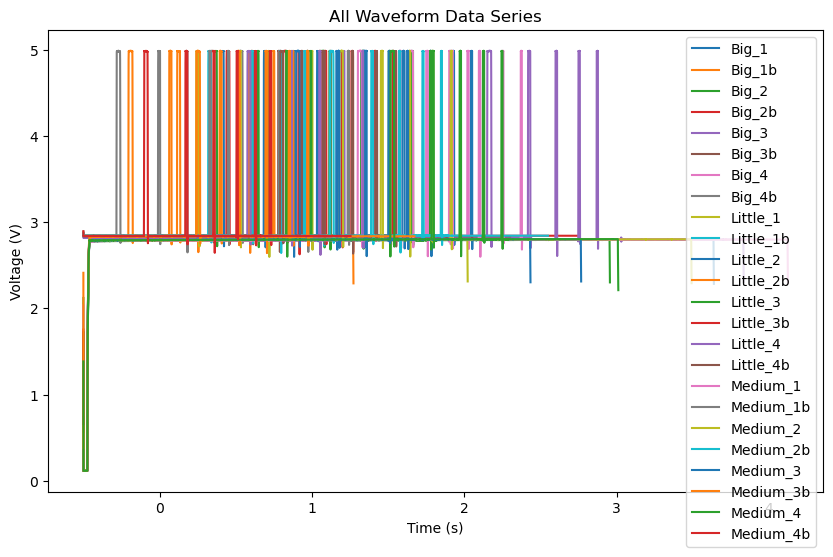

In [39]:
#plot all files with the use of dictionary function (data)
plt.figure(figsize=(10,6))

for name, (time, voltage) in data.items():
    plt.plot(time, voltage, label=name)

plt.title("All Waveform Data Series")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.legend()
plt.show()

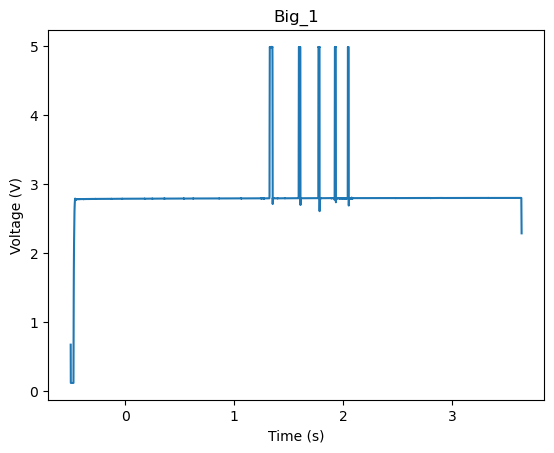

In [40]:
# plot one file:
time, voltage = data["Big_1"]

plt.plot(time, voltage)
plt.title("Big_1")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.show()

In [41]:
def find_midpoints(time, voltage, show_plot=True):
    """Find timing of ball crossings"""
    
    # Write a function yourself, which identifies the peaks in the voltage,
    # and returns values for passing times and (possibly) their uncertainties
    # in it (but they are generally very small!).

    threshold = 3.0  # minimum voltage of peaks
    # getting the times at which the ball initially crosses the threshold ie the previous voltage is below the threshold and the current voltage is above
    passes = np.where((voltage[:-1] < threshold) & (voltage[1:] >= threshold))

    t_pass = time[passes]
    #we can estimate the uncertainty as the time difference between two measurements
    #t_pass_sigma = np.full_like(t_pass, np.mean(np.diff(time)))
    t_pass_sigma=1/50000 #sample rate 50000 khz, 50000 samples pr second? the same as above

    print("Times of first 5 peaks:", t_pass)
    print(f'uncertainties on time pass measurements: {t_pass_sigma}')
    
    #t_pass = [0.0, 0.1]
    #t_pass_sigma = [0.0001, 0.00001]
    
    return t_pass, t_pass_sigma

Times of first 5 peaks: [1.32484 1.59222 1.77254 1.92254 2.0425 ]
uncertainties on time pass measurements: 2e-05


Text(0, 0.5, 'Voltage (V)')

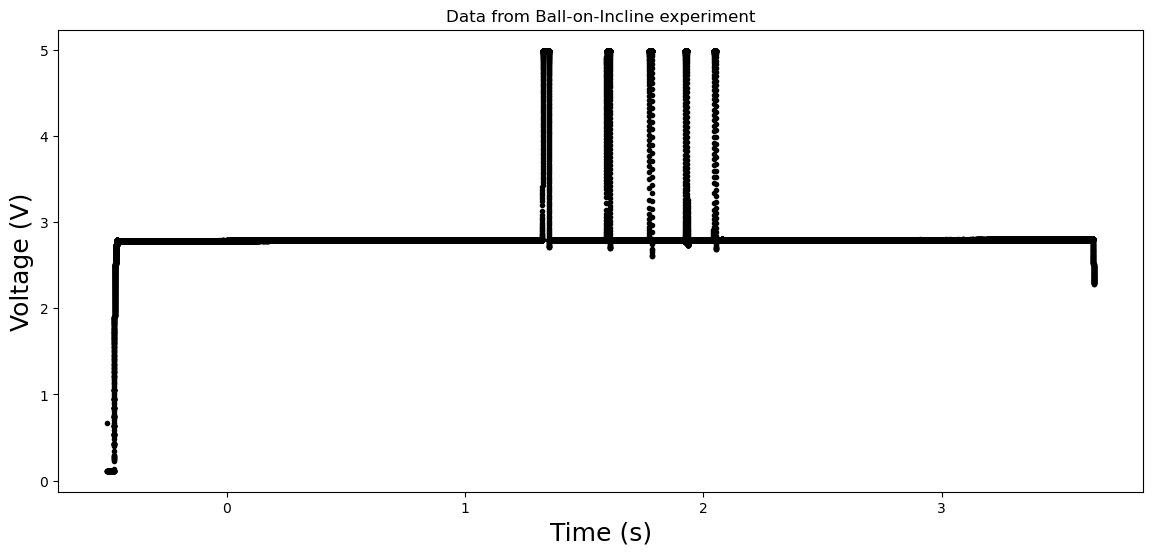

In [42]:
# Read the data and plot it (possibly with passing times in):

#evt make a loop afterwards

time, voltage = data["Big_1"]
timepass, timepass_sig = find_midpoints(time, voltage)

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(time, voltage, 'k.', label='Measurements')
ax.set_title("Data from Ball-on-Incline experiment")
ax.set_xlabel("Time (s)", fontsize=18)
ax.set_ylabel("Voltage (V)", fontsize=18)


In [43]:
#gate positions weighted means

def weighted_mean(value, error) :
    value = np.array(value)   # convert to array to allow element-wise calculations
    error = np.array(error)   # convert to array
    assert(len(value) == len(error))
    wmean = np.sum((value/(error**2)) / np.sum(1.0/(error**2)))
    wmean_err = error = np.sqrt(1.0/np.sum(1.0/np.square(error)))
    return wmean, wmean_err

wgate1, wgate1_err=weighted_mean(gate1, sig_gate1) #m
wgate2, wgate2_err=weighted_mean(gate2, sig_gate2) #m
wgate3, wgate3_err=weighted_mean(gate3, sig_gate3) #m
wgate4, wgate4_err=weighted_mean(gate4, sig_gate4) #m
wgate5, wgate5_err=weighted_mean(gate5, sig_gate5) #m

wgates=[wgate1, wgate2, wgate3, wgate4, wgate5]
wgates_err=[wgate1_err, wgate2_err, wgate3_err, wgate4_err, wgate5_err]

combined_wgates = np.array(list(zip(wgates, wgates_err)))
print(combined_wgates)

#plt.plot(wgates, '.')


[[1.63103670e-01 9.57826285e-05]
 [3.40408257e-01 9.57826285e-05]
 [5.21616514e-01 9.57826285e-05]
 [7.11997248e-01 9.57826285e-05]
 [8.87354144e-01 2.22988244e-04]]


### Plot s as a function of t to determine a

Text(0, 0.5, 'Distance (m)')

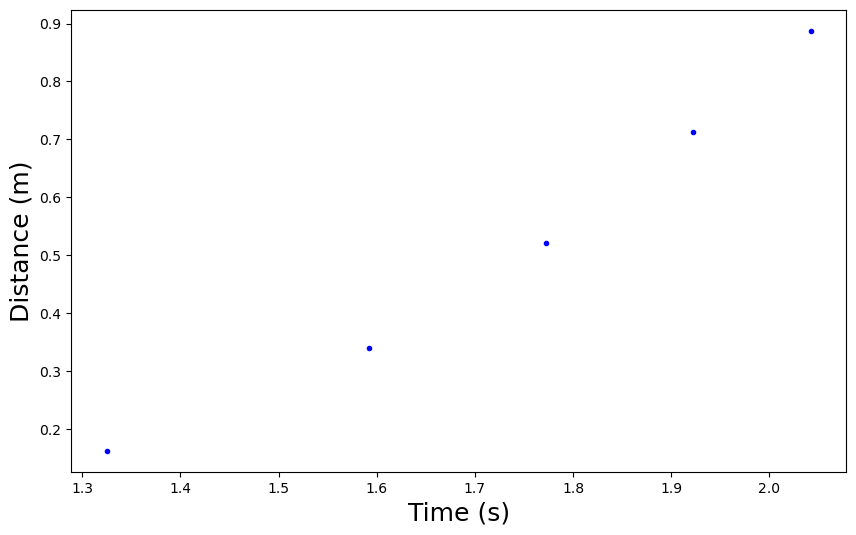

In [44]:
#plotting and defining for chi2

#plotting the S-t graph
fig2, ax2 = plt.subplots(figsize=(10,6))
ax2.errorbar(timepass, combined_wgates[:,0], xerr=timepass_sig, yerr=combined_wgates[:,1], fmt='.', color='b')
ax2.set_xlabel('Time (s)', fontsize=18)
ax2.set_ylabel('Distance (m)', fontsize=18)

In [45]:
#fitting
def acc_func (t, a, V0, S0):
    return 1/2*a*t**2+V0*t+S0

In [46]:
#fitting
chi2_object_function = cost.LeastSquares(timepass, combined_wgates[:,0], combined_wgates[:,1], acc_func)
m = Minuit(chi2_object_function, a=1.0, V0=-1.0, S0=0.0)
m.migrad()




┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 56.45 (χ²/ndof = 28.2)     │              Nfcn = 79               │
│ EDM = 2.33e-12 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  1.5454   │  0.0020   │            │            │         │         │       │
│ 1 │ V0   │  -1.5916  │  0.0033   │            │            │         │         │       │
│ 2 │ S0   │  0.9155   │  0.0027   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬────────────────────────────┐
│    │        a       V0       S0 │
├────┼────────────────────────────┤
│  a │ 4.14e-06    -7e-6     5e-6 │
│ V0 │    -7e-6 1.11e-05    -9e-6 │
│ S0 │     5e-6    -9e-6 7.24e-06 │
└────┴────────────────────────────┘

In [47]:
# p value
Ndof=len(timepass)-3 #three parameters adjusted
print(Ndof)
Chi2 = m.fval
Prob = stats.chi2.sf(Chi2, Ndof)
print(f'P-value of the fit is {Prob:.7f}  ')

2
P-value of the fit is 0.0000000  


### Acceleration determined with chisquare fit from a loop

should run as a loop and save 'a' values for each datafile.

In [48]:
#loop over same method
data_fit={} #new dictionary with the new results

for name in data:

    time, voltage = data[name]
    timepass, timepass_sig = find_midpoints(time, voltage)

    #fig, ax = plt.subplots(figsize=(14, 6))
    #ax.plot(time, voltage, 'k.', label='Measurements')
    #ax.set_title("Data from Ball-on-Incline experiment")
    #ax.set_xlabel("Time (s)", fontsize=18)
    #ax.set_ylabel("Voltage (V)", fontsize=18)

  

    chi2_object_function = cost.LeastSquares(timepass, combined_wgates[:,0], combined_wgates[:,1], acc_func)
    m = Minuit(chi2_object_function, a=1.0, V0=-1.0, S0=0.0)
    m.migrad()

    # p value
    Ndof=len(timepass)-3 #three parameters adjusted
    Chi2 = m.fval
    Prob = stats.chi2.sf(Chi2, Ndof)
    #print(f'P-value of the fit is {Prob:.7f} and we cannot reject the hypothesis of the function fiting the data ')

    
      # Extract fitted parameters
    a_fit  = m.values["a"]
    V0_fit = m.values["V0"]
    S0_fit = m.values["S0"]

    a_err  = m.errors["a"]
    V0_err = m.errors["V0"]
    S0_err = m.errors["S0"]

     #plotting the S-t graph
    #fig2, ax2 = plt.subplots(figsize=(10,6))
    #ax2.errorbar(timepass, combined_wgates[:,0], xerr=timepass_sig, yerr=combined_wgates[:,1], fmt='.', color='b')
    #ax2.set_xlabel('Time (s)', fontsize=18)
    #ax2.set_ylabel('Distance gates (m)', fontsize=18)

    # Adding fit function to plot:
    #x_axis = np.linspace(np.min(timepass), np.max(timepass), 1000)
    #ax2.plot(x_axis, acc_func(x_axis, a_fit, V0_fit, S0_fit), '-r', label= r"Chi2 fit model result") 

    # Adding fit results to plot:
    #fit_info = [f"$\\chi^2$ / $N_\\mathrm{{dof}}$ = {Chi2:.1f} / {Ndof}", f"Prob($\\chi^2$, $N_\\mathrm{{dof}}$) = {Prob:.3f}",]
    ##Ndecimals = max(0,-np.int32(np.log10(e)-1-np.log10(2)))                                # Number of significant digits
    ##fit_info.append(f"{a_fit} = ${v:{10}.{Ndecimals}{"f"}} \\pm {e:{10}.{Ndecimals}{"f"}}$")

    #plt.legend(title="\n".join(fit_info), fontsize=18, title_fontsize = 18, alignment = 'center');
    #fig.tight_layout()



    # Store results for this dataset
    data_fit[name] = {
        "a": a_fit,
        "a_err": a_err,
        "V0": V0_fit,
        "V0_err": V0_err,
        "S0": S0_fit,
        "S0_err": S0_err,
        "p_value": Prob
    }

    #print(f"{name}: a={a_fit:.5f} ± {a_err:.5f}, p={Prob:.10f}")


Times of first 5 peaks: [1.32484 1.59222 1.77254 1.92254 2.0425 ]
uncertainties on time pass measurements: 2e-05
Times of first 5 peaks: [-0.20482  0.06246  0.2428   0.39288  0.51276]
uncertainties on time pass measurements: 2e-05
Times of first 5 peaks: [1.05396 1.32236 1.50304 1.65324 1.77328]
uncertainties on time pass measurements: 2e-05
Times of first 5 peaks: [0.8099  1.07818 1.2586  1.40872 1.52868]
uncertainties on time pass measurements: 2e-05
Times of first 5 peaks: [2.1495  2.4174  2.5978  2.74802 2.86804]
uncertainties on time pass measurements: 2e-05
Times of first 5 peaks: [0.33144 0.59804 0.77806 0.92792 1.0478 ]
uncertainties on time pass measurements: 2e-05
Times of first 5 peaks: [1.29998 1.56848 1.74904 1.89932 2.01936]
uncertainties on time pass measurements: 2e-05
Times of first 5 peaks: [0.51722 0.78428 0.96442 1.11418 1.23408]
uncertainties on time pass measurements: 2e-05
Times of first 5 peaks: [0.24    0.52154 0.71172 0.8701  0.99664]
uncertainties on time pas

### Divide the datafile into the 6 groups dependent on ball size and forward/reverse

In [49]:
# Create empty groups
Big_norm = {}
Big_reverse = {}

Medium_norm = {}
Medium_reverse = {}

Little_norm = {}
Little_reverse = {}

for name, results in data_fit.items():

    cleaned = name.replace(".csv", "")   # remove .csv

    # ---- BIG ----
    if "Big" in cleaned:
        if cleaned.endswith("b"):
            Big_reverse[name] = results
        else:
            Big_norm[name] = results

    # ---- MEDIUM ----
    elif "Medium" in cleaned:
        if cleaned.endswith("b"):
            Medium_reverse[name] = results
        else:
            Medium_norm[name] = results

    # ---- LITTLE ----
    elif "Little" in cleaned:
        if cleaned.endswith("b"):
            Little_reverse[name] = results
        else:
            Little_norm[name] = results
data_fit

{'Big_1': {'a': 1.545368829902093,
  'a_err': 0.0020346072974724806,
  'V0': -1.591599434595545,
  'V0_err': 0.0033364877327770755,
  'S0': 0.9155234225351127,
  'S0_err': 0.002691450749278178,
  'p_value': np.float64(5.514304741467638e-13)},
 'Big_1b': {'a': 1.5441512615770399,
  'a_err': 0.002034822227885873,
  'V0': 0.7724699010195194,
  'V0_err': 0.0002972287676690213,
  'S0': 0.2889581980315829,
  'S0_err': 7.033544776445604e-05,
  'p_value': np.float64(4.331515447918579e-11)},
 'Big_2': {'a': 1.5439802491639454,
  'a_err': 0.002024489892935367,
  'V0': -1.1747350009058763,
  'V0_err': 0.0027742465060126647,
  'S0': 0.5437034118086423,
  'S0_err': 0.0018570834219375522,
  'p_value': np.float64(1.2146747133395722e-12)},
 'Big_2b': {'a': 1.5468245980690438,
  'a_err': 0.002027594945196613,
  'V0': -0.7999760164548545,
  'V0_err': 0.0022847271797884323,
  'S0': 0.30370856540324637,
  'S0_err': 0.0012442571754330205,
  'p_value': np.float64(2.2578249682138507e-11)},
 'Big_3': {'a': 1.

In [50]:
print(Big_norm.keys())
print(Big_reverse.keys())

print(Medium_norm.keys())
print(Medium_reverse.keys())

print(Little_norm.keys())
print(Little_reverse.keys())


dict_keys(['Big_1', 'Big_2', 'Big_3', 'Big_4'])
dict_keys(['Big_1b', 'Big_2b', 'Big_3b', 'Big_4b'])
dict_keys(['Medium_1', 'Medium_2', 'Medium_3', 'Medium_4'])
dict_keys(['Medium_1b', 'Medium_2b', 'Medium_3b', 'Medium_4b'])
dict_keys(['Little_1', 'Little_2', 'Little_3', 'Little_4'])
dict_keys(['Little_1b', 'Little_2b', 'Little_3b', 'Little_4b'])


In [51]:
#weighted mean pr group
groups = {
    "Big norm": Big_norm,
    "Big reverse": Big_reverse,
    "Medium norm": Medium_norm,
    "Medium reverse": Medium_reverse,
    "Little norm": Little_norm,
    "Little reverse": Little_reverse
}

def extract_a_and_err(group_dict):
    a_vals = np.array([group_dict[name]["a"] for name in group_dict])
    a_errs = np.array([group_dict[name]["a_err"] for name in group_dict])
    return a_vals, a_errs

weighted_results = {}   # store results here

for label, group in groups.items():

    # skip empty groups (just in case)
    if len(group) == 0:
        print(label, " → (empty)")
        continue

    a_vals, a_errs = extract_a_and_err(group)
    w_a_mean, w_a_err = weighted_mean(a_vals, a_errs)

    weighted_results[label] = (w_a_mean, w_a_err)

    chi2_a=np.sum((a_vals-w_a_mean)**2/a_errs**2) #remember not to use weighted mean uncertainty
    ndof_a=len(group)-1 #only one parameter which is the weighted mean
    p_a=stats.chi2.sf(chi2_a, ndof_a)

    print(f"{label} a: {w_a_mean:.6f} ± {w_a_err:.6f}, chi2: {chi2_a}, p-value: {p_a}")



Big norm a: 1.544144 ± 0.001014, chi2: 0.5426662510766398, p-value: 0.9094226652710844
Big reverse a: 1.546662 ± 0.001018, chi2: 3.0741656284630796, p-value: 0.38033104817275415
Medium norm a: 1.490130 ± 0.000984, chi2: 4.272647778935314, p-value: 0.233488366850831
Medium reverse a: 1.498276 ± 0.000987, chi2: 9.589785493682802, p-value: 0.02239512931966428
Little norm a: 1.384579 ± 0.000913, chi2: 7.048273933216482, p-value: 0.07037493135477049
Little reverse a: 1.387485 ± 0.000917, chi2: 89.64357848086092, p-value: 2.6128231828873434e-19


The chi2 and p-values from weighted means for each group are shown above. Pay attention to especially little reverse , little norm  and medium reverse - it seems like the datapoints here are inconsistent with each other.

### One mean acceleration for all balls to be used in the g calculations

either calculate one weighted mean from the bottom or claculate a weighted mean from the already determined weighted means? no because it differs on ball size as well, so here individual g need to be calculated

## Rail width and diameter of ball

In [52]:
#Weighted mean on the rail width
rail_width=np.array(rail_width)
sig_rail_width=np.array(sig_rail_width)

w_r_mean, w_r_mean_err = weighted_mean(rail_width, sig_rail_width)

chi2_r=np.sum((rail_width-w_r_mean)**2/(sig_rail_width**2))
ndof_r=len(rail_width)-1 #only one parameter which is the weighted mean
p_r=stats.chi2.sf(chi2_r, ndof_r)

print(f'weighted mean for rail width is {w_r_mean:.6f} ± {w_r_mean_err:.6f}, chi2: {chi2_r:.6f}, p-value: {p_r:.6f}"')

weighted mean for rail width is 0.005921 ± 0.000009, chi2: 46.958312, p-value: 0.000000"


rail width weighted mean chi2 test show that the values here are not consistent with each other with the assigned uncertainties.

In [53]:
#weighted mean of the diameter of the three balls
#small
ballS_d=np.array(ballS_d)
sig_ballS_d=np.array(sig_ballS_d)

w_d_ballS, w_d_ballS_err =weighted_mean(ballS_d, sig_ballS_d)
chi2_bS=np.sum((ballS_d-w_d_ballS)**2/sig_ballS_d**2)
ndof_bS=len(ballS_d)-1 #only one parameter which is the weighted mean
p_bS=stats.chi2.sf(chi2_bS, ndof_bS)

#medium
ballM_d=np.array(ballM_d)
sig_ballM_d=np.array(sig_ballM_d)

w_d_ballM, w_d_ballM_err =weighted_mean(ballM_d, sig_ballM_d)
chi2_bM=np.sum((ballM_d-w_d_ballM)**2/sig_ballM_d**2)
ndof_bM=len(ballM_d)-1 #only one parameter which is the weighted mean
p_bM=stats.chi2.sf(chi2_bM, ndof_bM)

#large
ballL_d=np.array(ballL_d)
sig_ballL_d=np.array(sig_ballL_d)

w_d_ballL, w_d_ballL_err =weighted_mean(ballL_d, sig_ballL_d)
chi2_bL=np.sum((ballL_d-w_d_ballL)**2/sig_ballL_d**2)
ndof_bL=len(ballL_d)-1 #only one parameter which is the weighted mean
p_bL=stats.chi2.sf(chi2_bL, ndof_bL)

print(f'weighted mean diameter for ball S {w_d_ballS:.6f} ± {w_d_ballS_err:.6f}, chi2: {chi2_bS:.6f}, p-value: {p_bS:.6f}"')
print(f'weighted mean diameter for ball M {w_d_ballM:.6f} ± {w_d_ballM_err:.6f}, chi2: {chi2_bM:.6f}, p-value: {p_bM:.6f}"')
print(f'weighted mean diameter for ball L {w_d_ballL:.6f} ± {w_d_ballL_err:.6f}, chi2: {chi2_bL:.6f}, p-value: {p_bL:.6f}"')



weighted mean diameter for ball S 0.009976 ± 0.000009, chi2: 1.857905, p-value: 0.602416"
weighted mean diameter for ball M 0.012686 ± 0.000009, chi2: 1.826195, p-value: 0.609251"
weighted mean diameter for ball L 0.014994 ± 0.000009, chi2: 0.803637, p-value: 0.848597"


## Angle calculations

Both goniometer and with the reverse/forward + trigonometri method.

Only able to compare the forward angle with the goniometer due to lack of data

In [54]:
#Goniometer weighted mean both sides of the goniometer
rail_angle = np.array(rail_angle1 + rail_angle2)
sig_rail_angle = np.array(sig_rail_angle1 + sig_rail_angle2)

w_gonio, w_gonio_err =weighted_mean(rail_angle, sig_rail_angle)
chi2_gonio=np.sum((rail_angle-w_gonio)**2/sig_rail_angle**2)
ndof_gonio=len(rail_angle)-1 #only one parameter which is the weighted mean
p_gonio=stats.chi2.sf(chi2_gonio, ndof_gonio)

print(f'weighted mean angle with goniometer {w_gonio:.6f} °  ± {w_gonio_err:.6f}, chi2: {chi2_gonio:.6f}, p-value: {p_gonio:.6f}"')

np.mean(rail_angle)

weighted mean angle with goniometer 13.937230 °  ± 0.007000, chi2: 464.342268, p-value: 0.000000"


np.float64(13.85375)

In [55]:
#angle based on trigonometri + table angle

#angle from trigonometri
length=np.array(base)
sig_length=np.array(sig_base)
height=np.array(height)
sig_height=np.array(sig_height)

#weighted means lenght and height #m
w_length, w_length_err =weighted_mean(length, sig_length)
chi2_length=np.sum((length-w_length)**2/sig_length**2)
ndof_length=len(length)-1 #only one parameter which is the weighted mean
p_length=stats.chi2.sf(chi2_length, ndof_length)

print(f'weighted mean length trigonemetry {w_length:.6f} ± {w_length_err:.6f}, chi2: {chi2_length:.6f}, p-value: {p_length:.6f}"')

w_height, w_height_err =weighted_mean(height, sig_height)
chi2_height=np.sum((height-w_height)**2/sig_height**2)
ndof_height=len(height)-1 #only one parameter which is the weighted mean
p_height=stats.chi2.sf(chi2_height, ndof_height)

print(f'weighted mean height trigonemetry {w_height:.6f} ± {w_height_err:.6f}, chi2: {chi2_height:.6f}, p-value: {p_height:.6f}"')

angle_tri=np.degrees(np.arctan(w_height/w_length))


print(f'angle of incline derived with trigonometry {angle_tri:.6f} °, need error propagation on this')

#angle from table based on acceleration
#here we get three values dependent on ball size
def table_angle (a_norm, a_rev, angle):
    dtheta=((a_norm-a_rev)/(a_norm+a_rev))*np.tan(angle)
    return dtheta

dtheta_results={}

for size in ["Big", "Medium", "Little"]: #groups defined earlier

    a_norm, err_norm = weighted_results[f"{size} norm"]
    a_rev,  err_rev  = weighted_results[f"{size} reverse"]

    dtheta = table_angle(a_norm, a_rev, angle_tri)

    dtheta_results[size] = dtheta

    print(f'{size} dtheta: {dtheta:.6f}° no error propagation')


weighted mean length trigonemetry 0.900470 ± 0.000242, chi2: 0.175844, p-value: 0.981391"
weighted mean height trigonemetry 0.223306 ± 0.000180, chi2: 11.378710, p-value: 0.009845"
angle of incline derived with trigonometry 13.927734 °, need error propagation on this
Big dtheta: -0.003832° no error propagation
Medium dtheta: -0.012825° no error propagation
Little dtheta: -0.004931° no error propagation


## Calculate g 

calculate g blinded and do error propagation to get the uncertainty on g

6 g's 
with goniometer angle and 3 ball sizes
with trigonometry and table and

In [78]:
#set up blindind

blinded = True            # Add a random (but fixed) offset to the 30cm and 2m data seperately

r = np.random             # Random generator
r.seed(42)                # Set a random seed (but a fixed one)

if blinded:
    blinding = r.normal(0, 0.1)      # I add a constant (Gaussian with +-10cm) to remain "blind"
else:
    blinding = 0                    #remember to add blinding and not blinded to the function!!


In [84]:
#weighted means of ball acceleration by size


a_big_norm_mean = weighted_results["Big norm"][0]
a_big_norm_err  = weighted_results["Big norm"][1]
a_big_rev_mean = weighted_results["Big reverse"][0]
a_big_rev_err  = weighted_results["Big reverse"][1]

print(a_big_norm_mean, a_big_rev_mean)

big_a, big_a_err=weighted_mean([a_big_rev_mean, a_big_norm_mean], [a_big_rev_err, a_big_norm_mean])

print(f'Big weighted mean a {big_a:.6f} +- {big_a_err:.6f}' )

a_medium_norm_mean = weighted_results["Medium norm"][0]
a_medium_norm_err  = weighted_results["Medium norm"][1]
a_medium_rev_mean = weighted_results["Medium reverse"][0]
a_medium_rev_err  = weighted_results["Medium reverse"][1]

medium_a, medium_a_err=weighted_mean([a_medium_rev_mean, a_medium_norm_mean], [a_medium_rev_err, a_medium_norm_mean])

print(f'Medium weighted mean a {medium_a:.6f} +- {medium_a_err:.6f}' )

a_little_norm_mean = weighted_results["Little norm"][0]
a_little_norm_err  = weighted_results["Little norm"][1]
a_little_rev_mean = weighted_results["Little reverse"][0]
a_little_rev_err  = weighted_results["Little reverse"][1]

little_a, little_a_err=weighted_mean([a_little_rev_mean, a_little_norm_mean], [a_little_rev_err, a_little_norm_mean])

print(f'Little weighted mean a {little_a:.6f} +- {little_a_err:.6f}' )

1.5441443779109034 1.5466618969728811
Big weighted mean a 1.546662 +- 0.001018
Medium weighted mean a 1.498276 +- 0.000987
Little weighted mean a 1.387485 +- 0.000917


In [80]:
def gravity (a, theta, dtheta, Dball, drail): #which formula?
    g_a=a/(np.sin(theta+dtheta))*(1+2/5*(Dball**2/(Dball**2-drail**2)))+blinding
    g_b=a/(np.sin(theta-dtheta))*(1+2/5*(Dball**2/(Dball**2-drail**2)))+blinding
    return g_a, g_b

In [86]:
#goniometer angle and three ball sizes (no dtheta)

g_gonio_big_a, g_gonio_big_b=gravity(big_a, w_gonio, 0, w_d_ballL, w_r_mean)
g_gonio_medium_a, g_gonio_medium_b=gravity(medium_a, w_gonio, 0, w_d_ballM, w_r_mean)
g_gonio_little_a, g_gonio_little_b=gravity(little_a, w_gonio, 0, w_d_ballS, w_r_mean)

print(f'g for goniometer and big ball {g_gonio_big_a} no error propapgation')
print(f'g for goniometer and medium ball {g_gonio_medium_a} no error propapgation')
print(f'g for goniometer and small ball {g_gonio_little_a} no error propapgation')

g for goniometer and big ball 2.3756357305959006 no error propapgation
g for goniometer and medium ball 2.3602153485761117 no error propapgation
g for goniometer and small ball 2.339606685045061 no error propapgation


In [87]:
#with table and trigonometry

g_tri_big_a, g_tri_big_b=gravity(big_a, angle_tri , dtheta_results["Big"], w_d_ballL, w_r_mean)
g_tri_medium_a, g_tri_medium_b=gravity(medium_a, angle_tri, dtheta_results["Medium"], w_d_ballM, w_r_mean)
g_tri_little_a, g_tri_little_b=gravity(little_a, angle_tri, dtheta_results["Little"], w_d_ballS, w_r_mean)

print(f'g for goniometer and big ball {g_tri_big_a} or {g_tri_big_b} no error propapgation')
print(f'g for goniometer and medium ball {g_tri_medium_a} or {g_tri_big_b} no error propapgation')
print(f'g for goniometer and small ball {g_tri_little_a} or {g_tri_big_b} no error propapgation')

g for goniometer and big ball 2.382142604797525 or 2.378345996493236 no error propapgation
g for goniometer and medium ball 2.371294363813999 or 2.378345996493236 no error propapgation
g for goniometer and small ball 2.3465608283549706 or 2.378345996493236 no error propapgation


# What to do next?

From the V(t) data you should be able to determine five times at which the ball passed. Discuss in the group how to do this best, and possibly test it by seeing if the result is "invariant" between different data sets.

Note that getting an uncertainty can be hard, and think about the relevance of such an uncertainty, which should anyway be rather small.